<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.955 · Models avançats de mineria de dades · PAC1</p>
<p style="margin: 0; text-align:right;">2021-1 · Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
    <p style="margin: 0; text-align:right; padding-button: 100px;"><b>Alumne: Jordi Puig Ovejero</b></p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PAC 1: Preparació de dades

En aquesta activitat pràctica veurem com aplicar diferents tècniques per a la càrrega i preparació de dades:

 <ol start="1">
  <li>Càrrega del conjunt de dades</li>
  <li>Anàlisi de les dades
  <br>2.1 Anàlisi estadístic bàsic
  <br>2.2 Anàlisi exploratori de les dades
  <li>Reducció de la dimensionalitat</li>
  <li>Entrenament i test</li>
</ol>

**Important:** Cada un dels exercicis pot suposar diversos minuts d'execució, de manera que el lliurament s'ha de fer en format notebook i en format html, on es vegi el codi, els resultats i comentaris de cada exercici. Es pot exportar el notebook a html des del menú File $\to$ Download as $\to$ HTML.

**Important:** Hi ha un tipus de cel·la especial per albergar text. Aquest tipus de cel·la us serà molt útil per respondre a les diferents preguntes teòriques plantejades al llarg de cada PAC. Per canviar el tipus de cel·la a aquest tipus, al menú: Cell $\to$ Cell Type $\to$ Markdown.
   
Per a això, necessitarem les següents llibreries:

In [1]:
from six import StringIO

from IPython.display import Image 
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from scipy import stats
import pydotplus
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', None)
import csv
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# 1. Càrrega del conjunt de dades (1 punt)

En primer lloc, haureu de carregar el conjunt de dades Breast Cancer Wisconsin (més informació a https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). Aquest es pot descarregar d'Internet o es pot carregar directament usant una llibreria de ``scikit-learn``, que incorpora un conjunt de datasets molt coneguts i emprats per mineria de dades i machine learning (https://scikit-learn.org/stable /datasets.html).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> carregueu el conjunt de dades "Breast Cancer Wisconsin" i mostreu:
  <br> - El nombre i nom dels atributs (variables que podrien ser usades per a predir la resposta "Diagnosis")
  <br> - El nombre de files obtingudes
  <br> - Verifiqueu si hi ha o no dades que falten ( "missing values") i en quines columnes
</div>

**Suggeriment**: si feu servir ``sklearn`` (sklearn.datasets.load_breast_cancer), exploreu les diferents keys de l'objecte obtingut.
    
**Suggeriment**: potser us resulta útil passar les dades (atributs + target) a un dataframe de ``pandas``.

In [2]:
# primer carreguem el data set amb sklearn
data = datasets.load_breast_cancer()

# transformem a dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)

# afegim la variable objectiu com a diagnosis
df['diagnosis'] = data.target

# reemplaçem els valors 0 per M i el valor per B
df.loc[df['diagnosis'] == 1, 'diagnosis'] = 'B'
df.loc[df['diagnosis'] == 0, 'diagnosis'] = 'M'

# mostrem les primeres
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


Hem carregat les dades i veiem els atributs per a cada nucli cel·lular més la variable de sortida (diagnosis):
 
    	a) radius (mitjana de distàncies del centre als punts del perímetre)
        b) texture (desviació estàndard dels valors a escala de grisos)
        c) perimeter (perímetre)
        d) area (àrea)
        e) smoothness (variació local de longituds de radi)
        f) compactness (perimeter^2 / area - 1.0)
        g) concavity (gravetat de les porcions còncaves del contorn)
        h) concave points (nombre de porcions còncaves del contorn)
        i) symmetry (simetria)
        j) fractal dimension ("coastline approximation" - 1)

Per cada un d'aquests valors de les cel·lulars tumorals de cada pacient tenim la mitja (mean), error estàndard (error) i pitjor valor (worst)

Diagnosis és una variable de classe amb dos valors (M/B), on M identifica els tumors malignes i B els benignes.

In [3]:
# contem els atributs
print('Tenim un total de:', len(df), 'registres.')

# contem les columnes
print('Tenim un total de:', len(df.columns) - 1, 'atributs numèrics i un objeciu o sortida.')

Tenim un total de: 569 registres.
Tenim un total de: 30 atributs numèrics i un objeciu o sortida.


No tenim <strong>cap valor NA o missing value</strong> en el dataset.

In [4]:
df.isnull().values.any()

False

# 2. Anàlisi de les dades (3 punts)

## 2.1 Anàlisi estadístic bàsic

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> feu un anàlisi estadístic bàsic:
    <br> - Il·lustreu gràficament la freqüència d'aparició de les variables categòriques, indicant el nombre.
    <br> - Calculeu per a cada atribut numèric del conjunt de dades, el seu valor mitjà i desviació estàndard. 
</div>

**Consell**: podeu fer servir la llibreria ``pandas`` i les seves funcions ``describe`` i ``value_counts``.

Pacients amb tumor benigne:  357
Pacients amb tumor maligne:  212


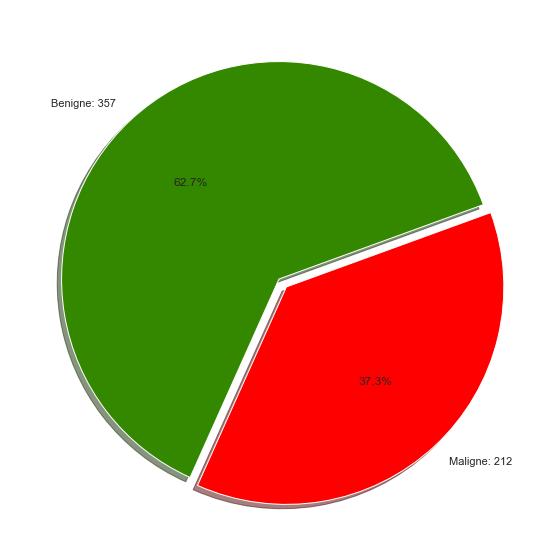

In [5]:
classes = df.groupby('diagnosis')['diagnosis'].count()
plt.figure(figsize=(30,10))
sns.set(font_scale=1)
colors = ['#338800','#ff0000']
plt.pie(classes,labels = ['Benigne: ' +  str(classes.iloc[0]),'Maligne: ' +str(classes.iloc[1])], colors=colors, explode = [0 ,0.05], startangle=20, shadow =True,autopct='%1.1f%%');

print("Pacients amb tumor benigne: ", classes.iloc[0])
print("Pacients amb tumor maligne: ", classes.iloc[1])

Tenim més d'una tercera part (37.3%) dels tumors com a malignes i la resta són benignes (62.7%).

Ara anem a veure tant la mitja com la desviació estàndard dels diferents atributs numèrics:

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Si ens centrem en el valor mean de cada cas, sobten les desviacions altes tant del perímetre com l'àrea, tenen un desviació molt gran. 

## 2.2 Anàlisi exploratori de les dades

El primer que mostrarem serà la distribució de les variables mean:

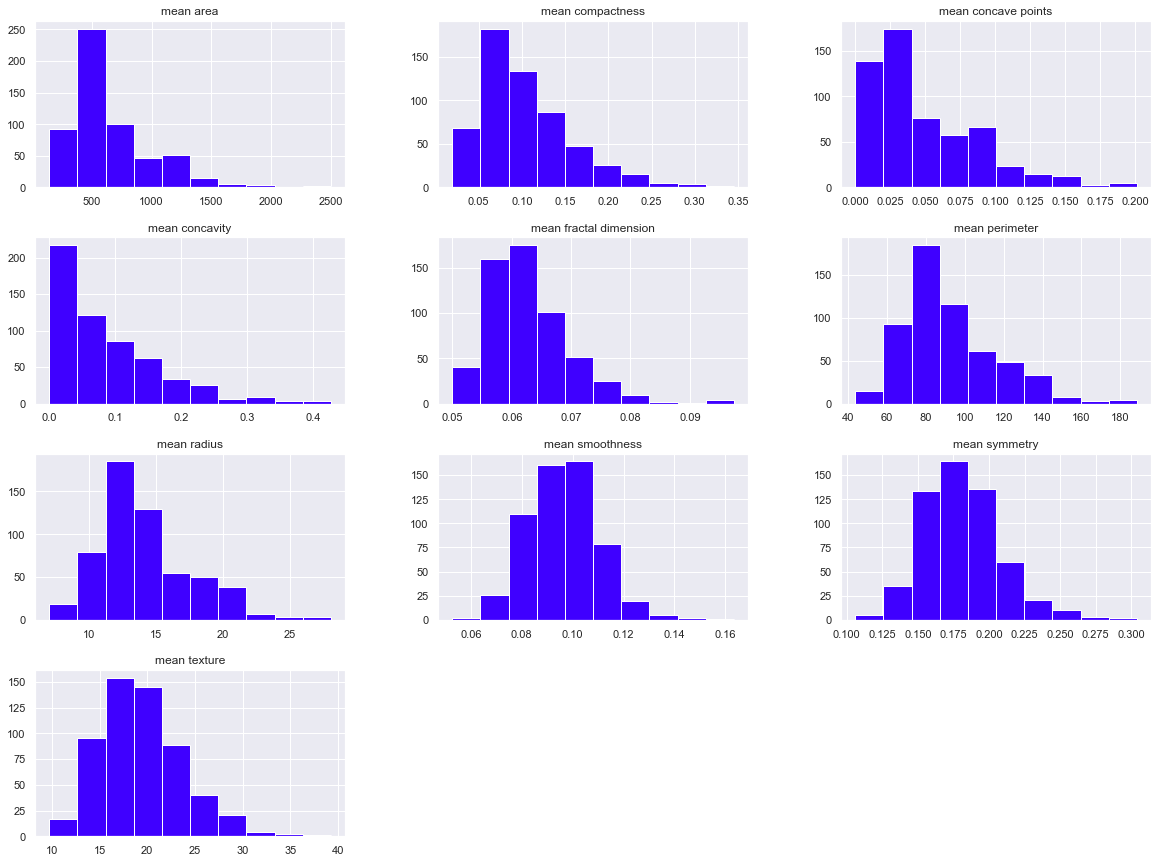

In [7]:
df_means = df.iloc[:,:10]
plt_means = df_means.hist(figsize = (20,15), color='#3F00FF')

La majoria de les distribucions és veuen com a normals excepte algunes com 'mean concavity'. Segurament si la passem a escala logaritmica tindrem una distribució normalitzada.

En aquest exercici anem a explorar la relació d'alguns dels atributs numèrics amb la variable resposta ("Diagnosi"), tant gràficament com quantitativament i analitzarem les diferents correlacions. Per començar, seleccioneu els 4 atributs que voleu explorar. Si heu fet servir els noms de columnes proporcionats per ``sklearn``, una llista de possibles noms d'atributs serien:

In [8]:
#attr_to_explore = ['mean radius', 'mean texture', 'mean smoothness', 'mean symmetry']
# Farem l'anàlisi amb els 10 atributs de les cel·lules amb el valor mean. 
df_means = df.iloc[:,:10]
attr_to_explore = list(df_means.columns)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> utilitzant una llibreria gràfica, com ara "matplotlib", feu un gràfic del histograma de valors per a cada un dels atributs seleccionats, separats pels valors de classe de la resposta ("Diagnosi").

La finalitat és observar com es distribueix cada un dels atributs en funció de la valor de classe que prenen, per poder identificar de forma visual i ràpida si alguns atributs permeten diferenciar de forma clara els diferents diagnòstics dels tumors.
</div>

**Consell**: podeu fer servir el paràmetre ``alpha`` en els gràfics perquè s'aprecien els tres histogrames.

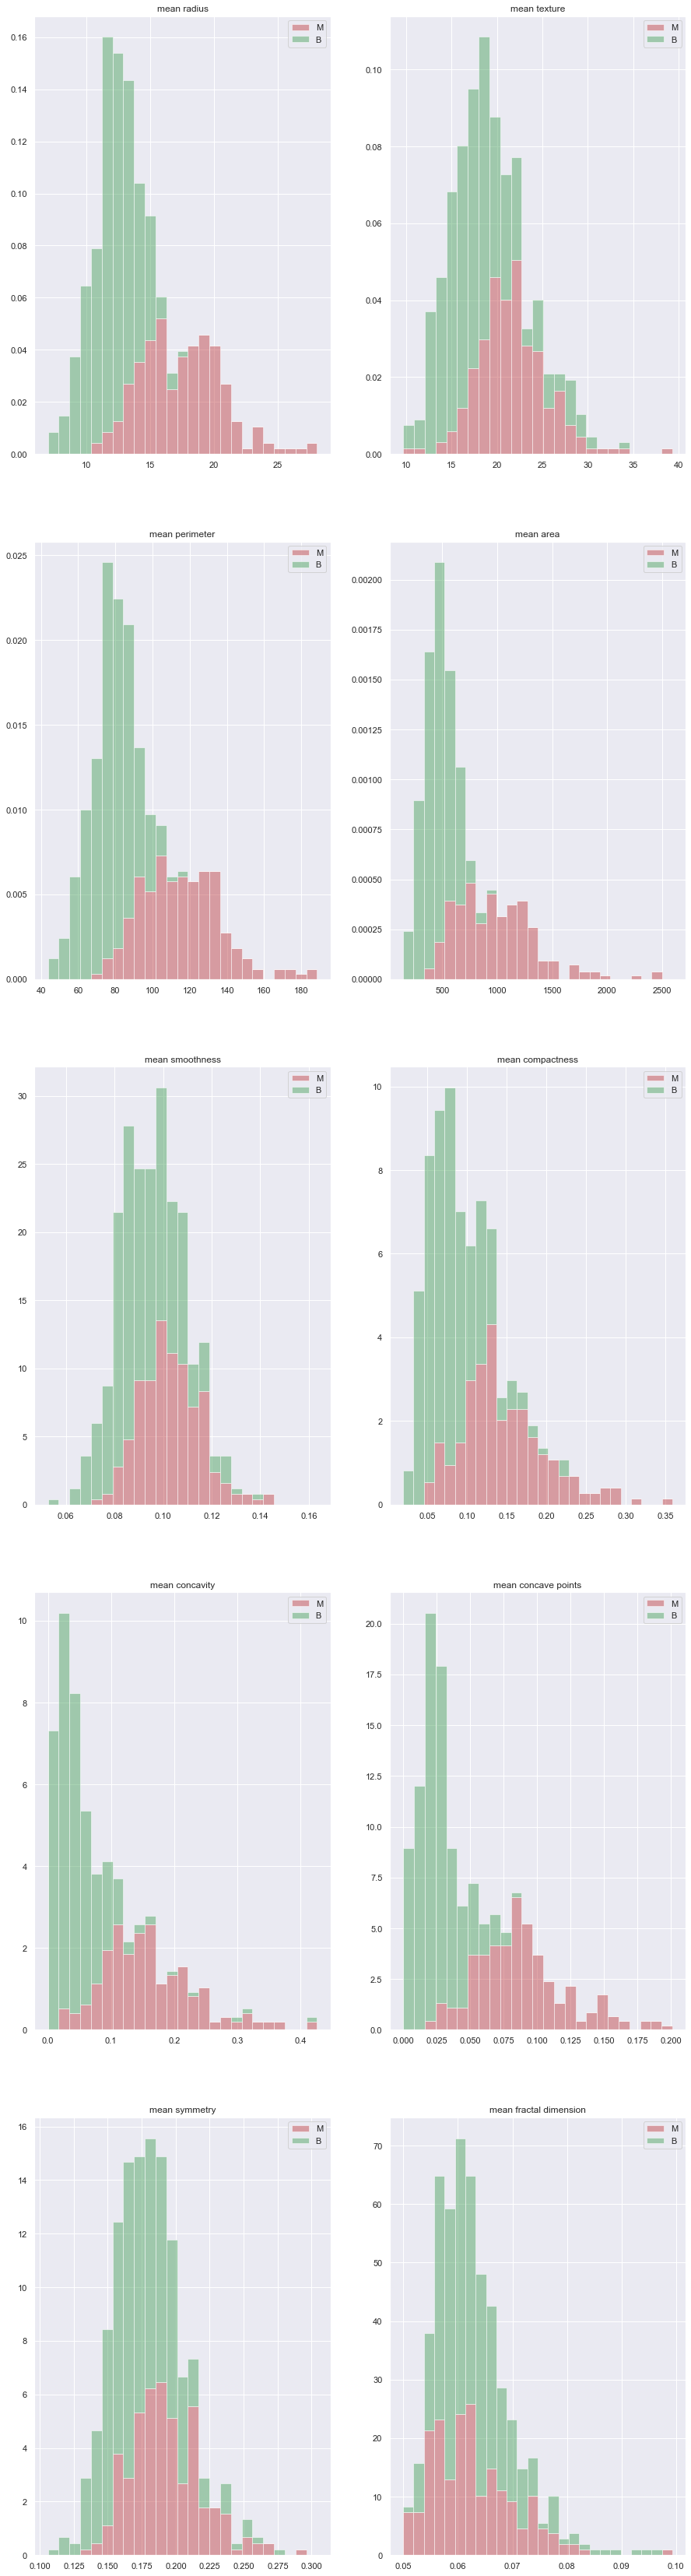

In [9]:
# fem split dels casos de tumors benignes y malignes

data_maligne = df[df['diagnosis'] == 'M']
data_benigne = df[df['diagnosis'] == 'B']

# montem els histogrames com subplots de 5 filas i dues columnes.
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,60))

idx = 0
for ax in axes.flat:
    ax.figure
    binwidth= (max(df[attr_to_explore[idx]]) - min(df[attr_to_explore[idx]])) / 25
    ax.hist([data_maligne[attr_to_explore[idx]], data_benigne[attr_to_explore[idx]]], bins=np.arange(min(df[attr_to_explore[idx]]), max(df[attr_to_explore[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, density = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(attr_to_explore[idx])
    idx = idx+1
plt.show()


Visualment podem apreciar que en general quan el tamany dels atributs és més gran més possibilitats de ser un tumor maligne, excepte en la simetria i fractal-dimension. És veu molt clar en el radi, perímetre, àrea o concavitat. 

Mostrem el mateix però ara amb boxplot:

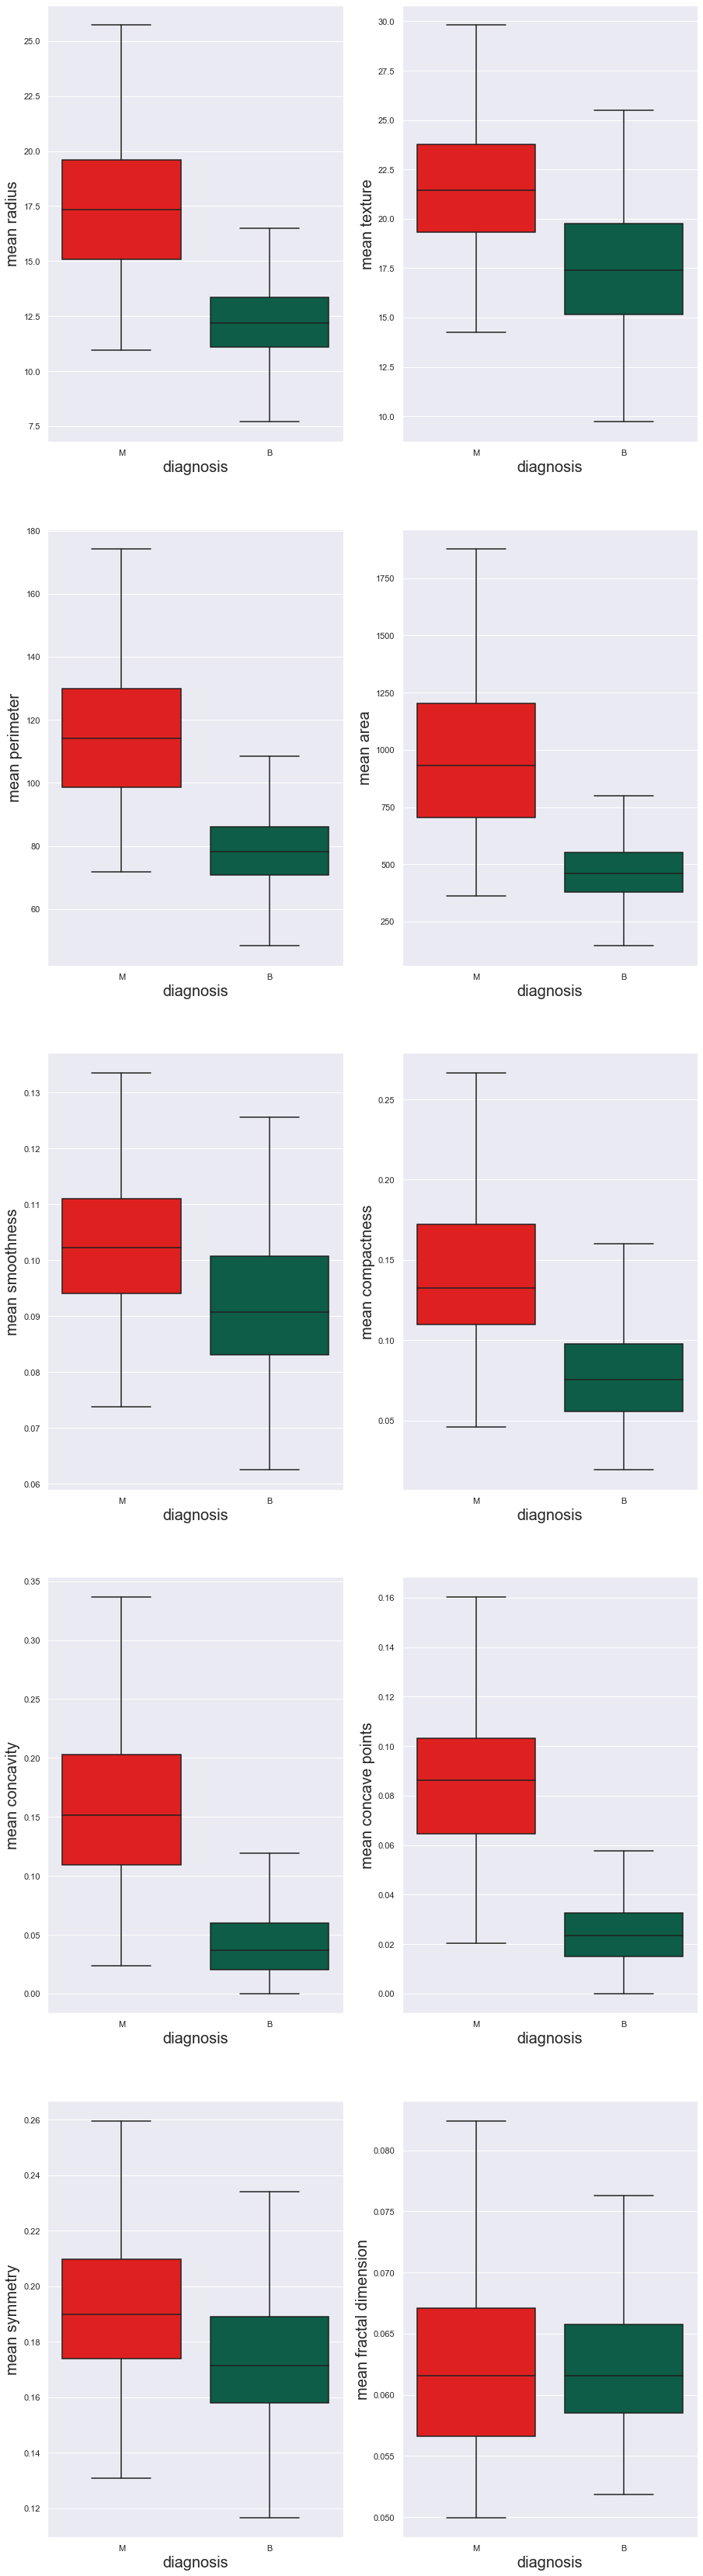

In [10]:
# mostrem per cada atribut els casos de maligne i benigne mitjançant boxplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,60))

idx = 0
for ax in axes.flat:
    plt.sca(ax)
    plt.ylabel(attr_to_explore[idx], size = 20)
    plt.xlabel('Diagnosis', size = 20)
    col = attr_to_explore[idx]
    my_colors = ["#ff0000", "#006a4e"]
    sns.set_palette(my_colors)
    sns.boxplot(x='diagnosis', y=col, data=df, showfliers=False)
    idx = idx+1
plt.show()



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> mirant els gràfics, quins atributs creus que tenen valors clarament diferents per a diagnòstics benignes i malignes? Quins atributs no?</div>

Com ja haviem vist els histogrames per el diagnòstic:

    * Tenim atributs molt clars com: mean area, mean perimiter, mean radius (totes molt relacionades amb el tamany). També mean compactness, mean concavity o mean concavity points.
    
    * Altres que també serien bons encara que no tant: mean texture, mean smothness o mean symmetry ja que es solapen alguns resultats de sortida (class) respecte els valors d'entrada (no gaires però).
    
    * Mean fractal dimension no seria, clarament, un bon atribut per a classificar els tumors. No es pot dir quina serà la sortida sabent el valor d'entrada.
    

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> per a cada un dels atributs representats en l'exercici anterior, mostreu la mitjana i la desviació estàndard per a cada valor de classe de la resposta.
</div>
    
La finalitat és verificar numèricament les diferències identificades anteriorment de forma visual.

In [11]:
pd.set_option('display.expand_frame_repr', False) 
for i in range(len(attr_to_explore)):
    print('Dades de: ' + attr_to_explore[i])
    print(df[attr_to_explore[i]].groupby(df['diagnosis']).describe())
    print('\n')

Dades de: mean radius
           count       mean       std     min     25%     50%    75%    max
diagnosis                                                                  
B          357.0  12.146524  1.780512   6.981  11.080  12.200  13.37  17.85
M          212.0  17.462830  3.203971  10.950  15.075  17.325  19.59  28.11


Dades de: mean texture
           count       mean       std    min      25%    50%     75%    max
diagnosis                                                                  
B          357.0  17.914762  3.995125   9.71  15.1500  17.39  19.760  33.81
M          212.0  21.604906  3.779470  10.38  19.3275  21.46  23.765  39.28


Dades de: mean perimeter
           count        mean        std    min     25%     50%      75%    max
diagnosis                                                                     
B          357.0   78.075406  11.807438  43.79  70.870   78.18   86.100  114.6
M          212.0  115.365377  21.854653  71.90  98.745  114.20  129.925  188.5




<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> mirant als valors mitjans i desviacions estàndard calculades, creus que són significatives les diferències per diagnòstics benignes i malignes?</div>

Sí. En alguns atributs com hem vist visualment: perímetre, textura, area, radi, concave points... tenim mitjes en els tumors malignes on els són conderablement superiors als benignes i les desviacions no són excesives.

Clarament veiem que fractal dimension no ens ajuda a discernir entre els diferents tipus de tumors perquè les dades són practicament iguals.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> calculeu i mostreu la correlació entre totes les variables del conjunt de dades.
</div>

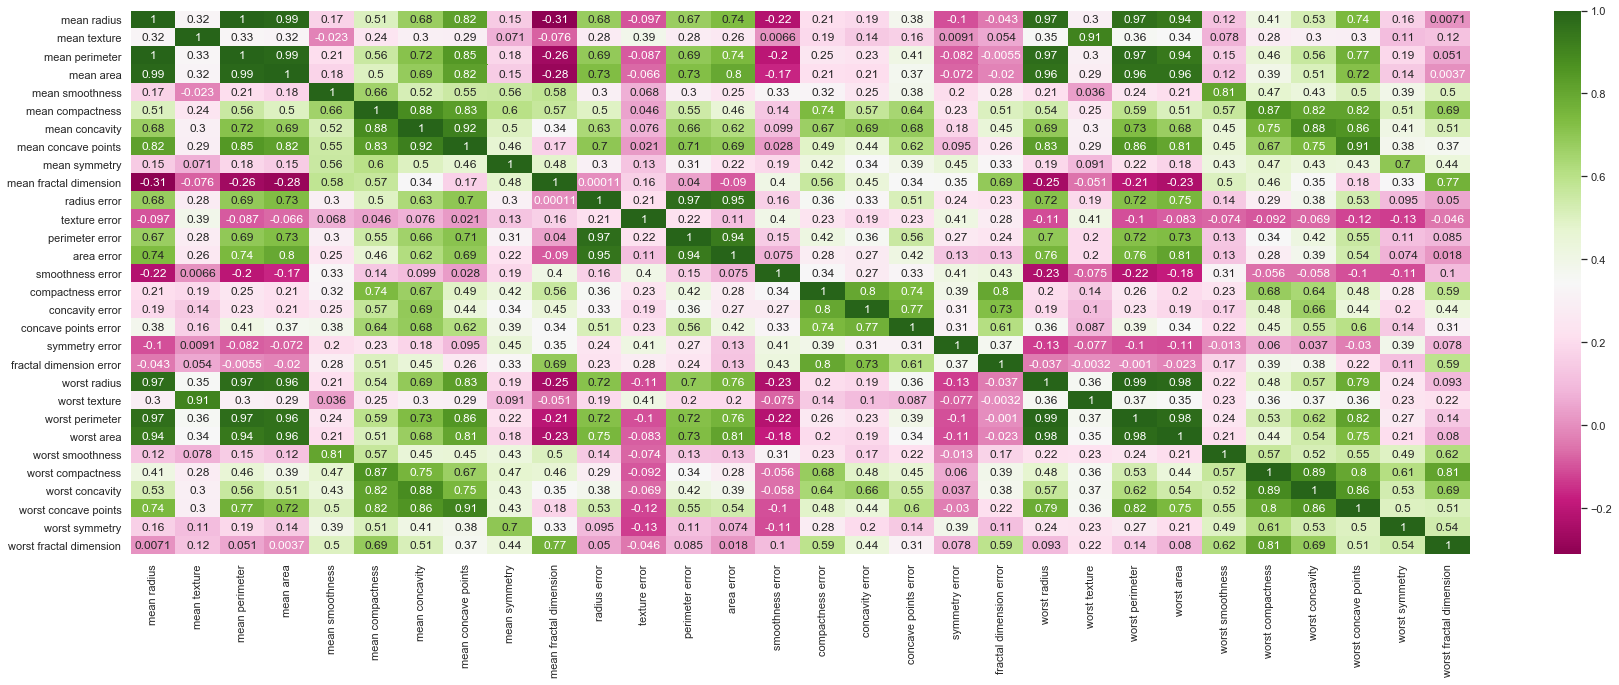

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize=(30,10))
sns.heatmap(correlation_matrix, annot = True, cmap="PiYG")
sns.set(font_scale=2)
plt.show()

Tenim moltes comparacions i no s'aprecia gaire però els quadres més verds indiquen una correlació més forta en valors positius i els més liles en negatiu. Els propers a 0 (blancs) indiquen un baixa correlació. La diagonal és la correlació entre les pròpies variables que obviament és 1.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> representeu gràficament les relacions entre totes les parelles de les variables "mean" del conjunt de dades.
    
La finalitat d'aquest exercici és poder observar i analitzar les correlacions de manera gràfica entre algunes de les variables.
</div>

**Consell**: podeu utilitzar la funció ``pairplot`` de la llibreria ``Seaborn``.

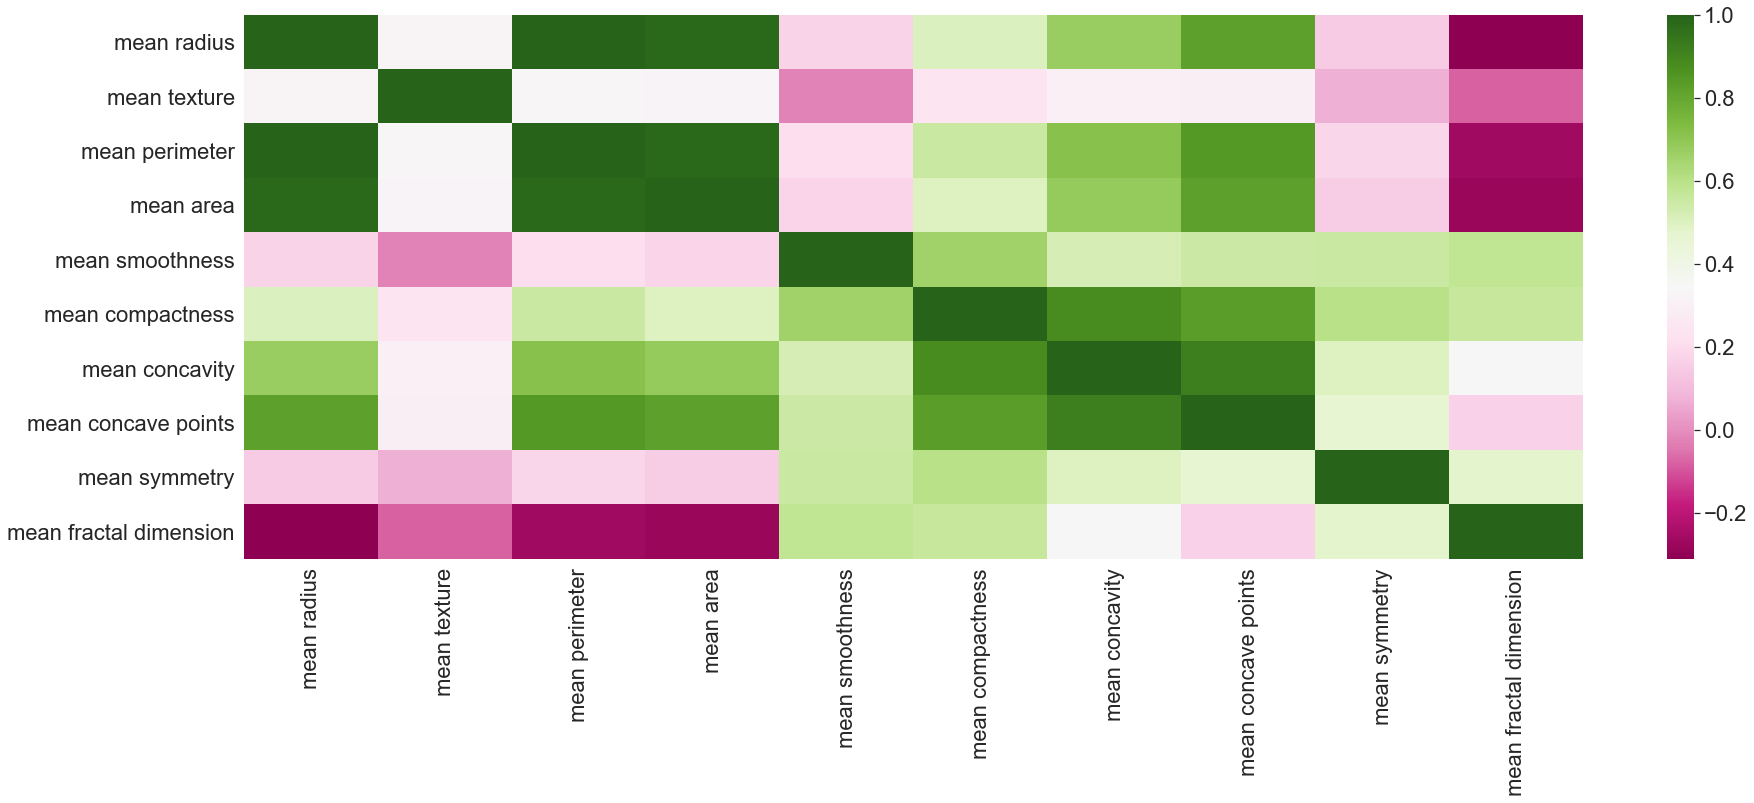

In [13]:
df_means = df.iloc[:,:10]
correlation_matrix = df_means.corr()
plt.figure(figsize=(30,10))
sns.heatmap(correlation_matrix, cmap="PiYG")
plt.show()

En el heatmap anterior hem comparat correlacions entre les variables mean. 
Area, perimetre i radi tenen una gran correlació positiva, quan augmenta una d'elles augmentan les altres. 
Concavity amb compactness i concave points també tenen una alta correlació positiva.
Hi han algunes negatives, radius amb fractal dimension, quan augmenta una disminueix l'altre.    

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> determineu quines són les variables amb una correlació superior al 90% i creeu un nou conjunt de dades (dataframe) eliminant aquestes variables.</div>

In [14]:
# montem una funció que extrau els parells d'atributs amb una correlació > 0.9 o < -0.9. 
# Les correlacions de valor 1 no les afegim perquè són artibuts amb ells mateixos, la línea diagonal del gràfic. 
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    retValues = xFiltered.unstack().sort_values().dropna()
    return retValues

corrFilter(df, .9)

worst concave points  mean concave points     0.910155
mean concave points   worst concave points    0.910155
worst texture         mean texture            0.912045
mean texture          worst texture           0.912045
mean concave points   mean concavity          0.921391
mean concavity        mean concave points     0.921391
area error            perimeter error         0.937655
perimeter error       area error              0.937655
worst area            mean radius             0.941082
mean radius           worst area              0.941082
worst area            mean perimeter          0.941550
mean perimeter        worst area              0.941550
area error            radius error            0.951830
radius error          area error              0.951830
mean area             worst perimeter         0.959120
worst perimeter       mean area               0.959120
mean area             worst area              0.959213
worst area            mean area               0.959213
mean area 

Eliminem els suficients atributs per a que no tinguem cap correlació superior a 0.9.

In [15]:
df_clean = df.drop(['mean radius', 'mean perimeter', 'mean concave points', 'worst texture', 'perimeter error', 'radius error', 'worst perimeter', 'worst radius', 'worst area'], axis=1)
print('Elements amb correlació major a 0.9 = ' + str(corrFilter(df_clean, .9).size))

clean = corrFilter(df_clean, .9)

Elements amb correlació major a 0.9 = 0


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> mirant les correlacions, quines variables són les que tenen una correlació més forta i han estat eliminades? Quin efecte pot tenir en el resultat final eliminar aquestes variables?
</div>

Hem eliminat els atributs: 'mean radius', 'mean perimeter', 'mean concave points', 'worst texture', 'perimeter error', 'radius error', 'worst perimeter', 'worst radius', 'worst area'.

Aquest model té una qualitat similar a l'original però amb molts menys atributs. Amb menys atributs el model és menys complex i podem reduïr també el temps de computació per a resoldre problemes de mineria de dades. 

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Bonus:</strong> Quin test estadístic podries fer servir per comparar les distribucions dels valors dels atributs quan els diagnòstics són benignes o malignes? Fes-lo servir per avaluar quins atributs (d'entre tots els del conjunt de dades) tenen valors més semblants a tumors benignes i malignes. Interpreta el resultat.
</div>

Com a test estadístic podem fer servir una comparació entre les mitjanes de les distribucions tant benignes com malignes de cada un dels atributs. Assumim normalitat ja que tenim mostres > 30. 

Farem servir el test t de Student: on 
       
    * hipòtesi nul·la: les mitjanes són similars entre les distribucions de M i B 
    * hipòtesi alternativa: les mitjanes no són similars i llavors podem dir que l'atribut SI és estadísticament significatiu per a resoldre si un tumor és benigne o maligne. En els test els valors de pvalor < 0.05 són atributs significatius rebutjant la hipòtesi nul·la.

In [16]:
df_ttest = df
significants = []
for c in df_ttest.columns[1:]:    
    if c != 'diagnosis':
        pvalue = stats.ttest_ind(df_ttest[c].loc[df_ttest.diagnosis=='M'], df_ttest[c].loc[df_ttest.diagnosis=='B'])[1]
        if pvalue<0.05:
            significants.append(c)
            print(f'Atribut {c} és estadíticament significatiu amb un pvalor = {pvalue:.2}')
        else:
            print(f'Atribut {c} NO és estadíticament significatiu')

Atribut mean texture és estadíticament significatiu amb un pvalor = 4.1e-25
Atribut mean perimeter és estadíticament significatiu amb un pvalor = 8.4e-101
Atribut mean area és estadíticament significatiu amb un pvalor = 4.7e-88
Atribut mean smoothness és estadíticament significatiu amb un pvalor = 1.1e-18
Atribut mean compactness és estadíticament significatiu amb un pvalor = 3.9e-56
Atribut mean concavity és estadíticament significatiu amb un pvalor = 1e-83
Atribut mean concave points és estadíticament significatiu amb un pvalor = 7.1e-116
Atribut mean symmetry és estadíticament significatiu amb un pvalor = 5.7e-16
Atribut mean fractal dimension NO és estadíticament significatiu
Atribut radius error és estadíticament significatiu amb un pvalor = 9.7e-50
Atribut texture error NO és estadíticament significatiu
Atribut perimeter error és estadíticament significatiu amb un pvalor = 1.7e-47
Atribut area error és estadíticament significatiu amb un pvalor = 5.9e-46
Atribut smoothness error N

In [17]:
print('Amb l''estadístic de t de student ens han sortit com a atributs significants per a valorar un tumor com a benigne o maligne: ' + str(significants))

Amb lestadístic de t de student ens han sortit com a atributs significants per a valorar un tumor com a benigne o maligne: ['mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'radius error', 'perimeter error', 'area error', 'compactness error', 'concavity error', 'concave points error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


# 3. Reducció de dimensionalitat (3 punts)

En aquest exercici haureu aplicar mètodes de reducció de dimensionalitat al conjunt original de dades. L'objectiu és reduir el conjunt d'atributs a un nou conjunt amb menys dimensions.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> apliqueu el mètode de reducció de dimensionalitat Principal Component Analysis (PCA) per reduir a 2 dimensions:
<br>- El conjunt de dades original
<br>- El conjunt de dades a el qual se li han extret les variables fortament correlacionades
</div>

**Nota**: Tingueu cura i no inclogueu la variable objectiu "Diagnosi" a la reducció de dimensionalitat. Volem poder explicar la variable objectiu en funció de la resta de variables reduïdes a dues dimensions.

**Consell**: no cal que programeu els algoritmes, podeu fer ús de les implementacions disponibles a la llibreria ``scikit-learn``.

In [18]:
# primer ho fem sobre el dataset complet i eliminem la variable de classe diagnosis.
df_pca_all = df.drop(['diagnosis'], axis=1)

# normalitzem totes els atributs amb la classe StandarScaler
scaler = StandardScaler()
scaler.fit(df_pca_all)
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_data = scaler.transform(df_pca_all)

# definim dos components per el PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None, svd_solver='auto', tol=0.0, whiten=False)
pca_all = pca.transform(scaled_data)

# mostrem els atributs i registres del original (columnes 30 i registres 569)
print('Registres i atributs del dataset original: ' + str(scaled_data.shape))

# mostrem els atributs i registres un cop fet el PCA (columnes 2 i registres 569)
print('Registres i atributs del nou dataset: ' + str(pca_all.shape))

Registres i atributs del dataset original: (569, 30)
Registres i atributs del nou dataset: (569, 2)


Hem realitzat el PCA sobre tot el conjunt de dades reduint-lo a dos atributs explicatius. Aquests atributs són dos noves dimensions generades a partir de les altres.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> genereu un gràfic (en 2D) amb el resultat del PCA usant colors diferents per a cada classe de la resposta, amb l'objectiu de visualitzar si és possible separar les classes emprant aquest mètode.</div>

Text(0, 0.5, 'Segon component principal')

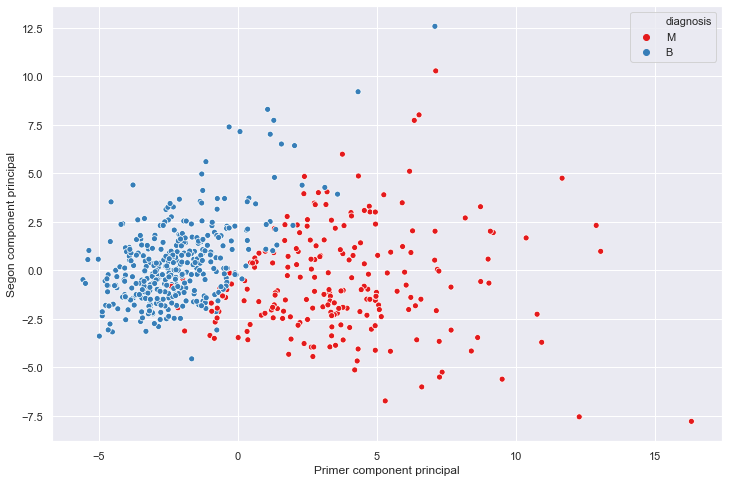

In [19]:
# per a generar el gràfic necessitem el dataset de les dues noves variables obtingudes a partir de les transformacions de les originals i la variable de classe diagnosi al dataset
ax = plt.figure(figsize=(12,8))
sns.set(t_scale=1)
sns.scatterpfonlot(pca_all[:,0], pca_all[:,1],hue=df['diagnosis'], palette ='Set1' )
plt.xlabel('Primer component principal')
plt.ylabel('Segon component principal')

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> comenteu el resultat.</div>

Veient la gràfica podem intuir que valors inferiors a 0 en el PC1 tenen inclinació a ser tumors benignes, en canvi conforme creix el PC1 tenim una clara tendencia a tumors malignes.

El PC2 no és tan clar, encara que els valors en aquest eix més al voltant de 0 són tumors benignes en canvi els malignes són valors més extrems o tenen més dispersió.

El PC1 discrimina millor que el PC2.

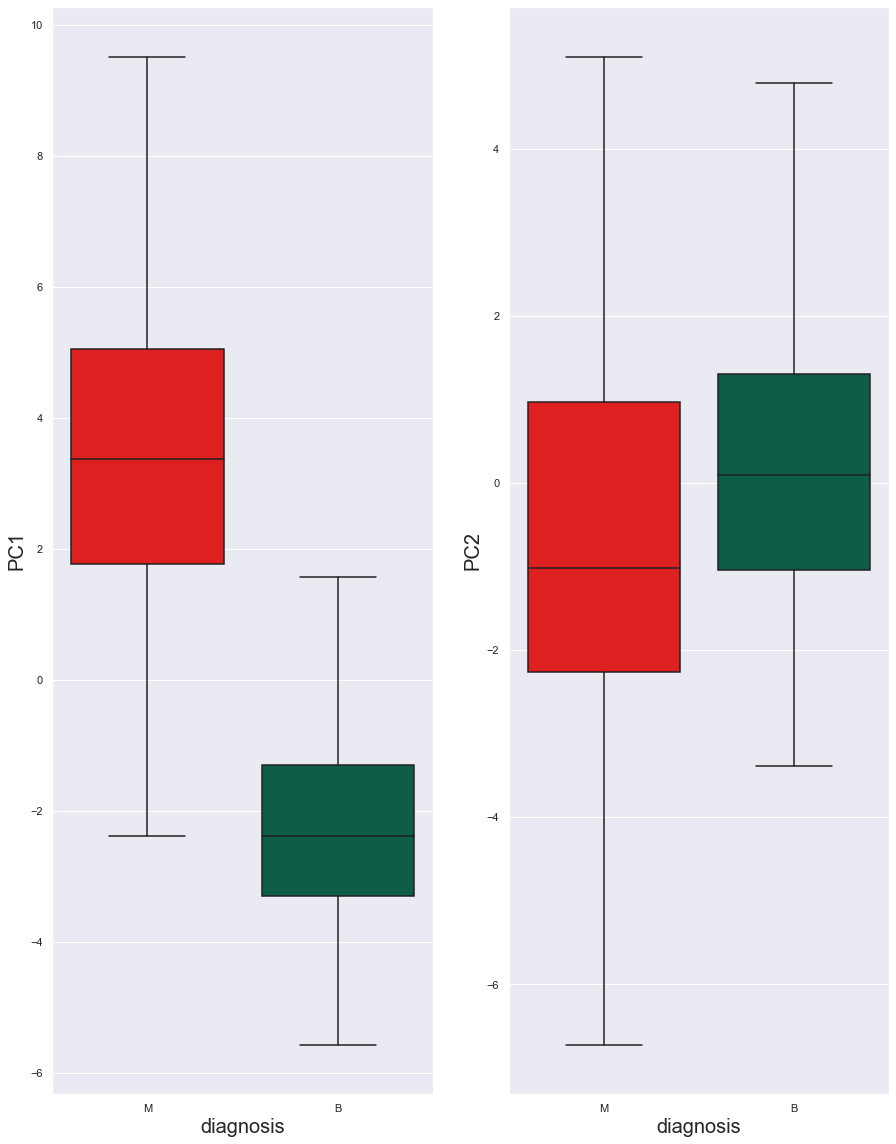

In [20]:
# anem a visualitzar amb plots. Primer transformem els arrays dels components principals resultats en un dataset 
df_pca_all = pd.DataFrame(pca_all, columns=['PC1', 'PC2'])
# afegim la variable de classe
diagnosis = df['diagnosis']
df_pca_all = df_pca_all.join(diagnosis)
df_pca_all.head()

# un cop tenim el dataframe mostrem els plots
attr_to_explore=['PC1', 'PC2']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,20))

idx = 0
for ax in axes.flat:
    plt.sca(ax)
    plt.ylabel(attr_to_explore[idx], size = 20)
    plt.xlabel('Diagnosis', size = 20)
    col = attr_to_explore[idx]
    my_colors = ["#ff0000", "#006a4e"]
    sns.set_palette(my_colors)
    sns.boxplot(x='diagnosis', y=col, data=df_pca_all, showfliers=False)
    idx = idx+1
plt.show()



En els boxplot és veu molt més evident el que havíem comentat. Valors alts de PC1 són clars indicadors de tumors malignes. En canvi, els valors de PC2 no són tan clars, es sobreposen força els plot, encara que, valors petits PC2 tendeixen a tumors malignes.

Registres i atributs del dataset original: (569, 21)
Registres i atributs del nou dataset: (569, 2)


Text(0, 0.5, 'Segon component principal')

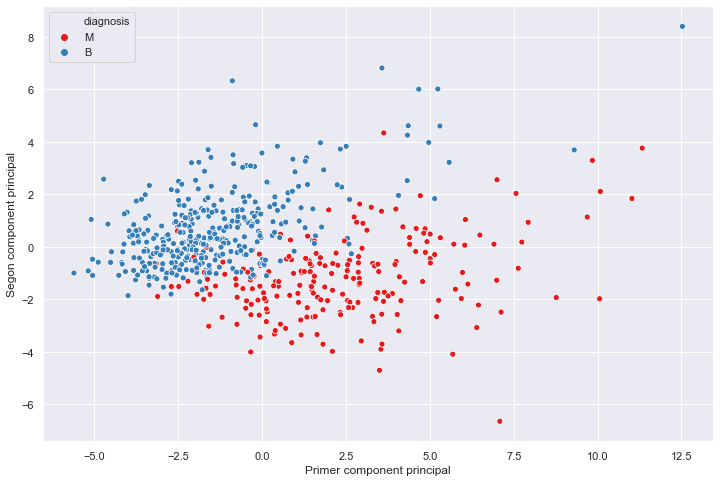

In [21]:
# anem a fer la mateixa prova però amb el dataset amb la reducció d'atributs
df_clean_pca_all = df_clean.drop(['diagnosis'], axis=1)

# normalitzem totes els atributs amb la classe StandarScaler
scaler = StandardScaler()
scaler.fit(df_clean_pca_all)
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_data = scaler.transform(df_clean_pca_all)

# definim dos components per el PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None, svd_solver='auto', tol=0.0, whiten=False)
pca_clean = pca.transform(scaled_data)

# mostrem els atributs i registres del original (columnes 21 i registres 569)
print('Registres i atributs del dataset original: ' + str(scaled_data.shape))

# mostrem els atributs i registres un cop fet el PCA (columnes 2 i registres 569)
print('Registres i atributs del nou dataset: ' + str(pca_clean.shape))

# ara mostrem el gràfic en 2D dels resultat
ax = plt.figure(figsize=(12,8))
sns.scatterplot(pca_clean[:,0], pca_clean[:,1],hue=df_clean['diagnosis'], palette ='Set1' )
plt.xlabel('Primer component principal')
plt.ylabel('Segon component principal')

Amb la reducció dels atributs el PCA ens en quant a la PC1 és similar; valors alts ens tenen més possibilitats de ser tumors malignes. En canvi ara PC2 discrimina millor i valors més alts tendeixen a ser benignes.

Ho mostrem gràficament amb boxplot:

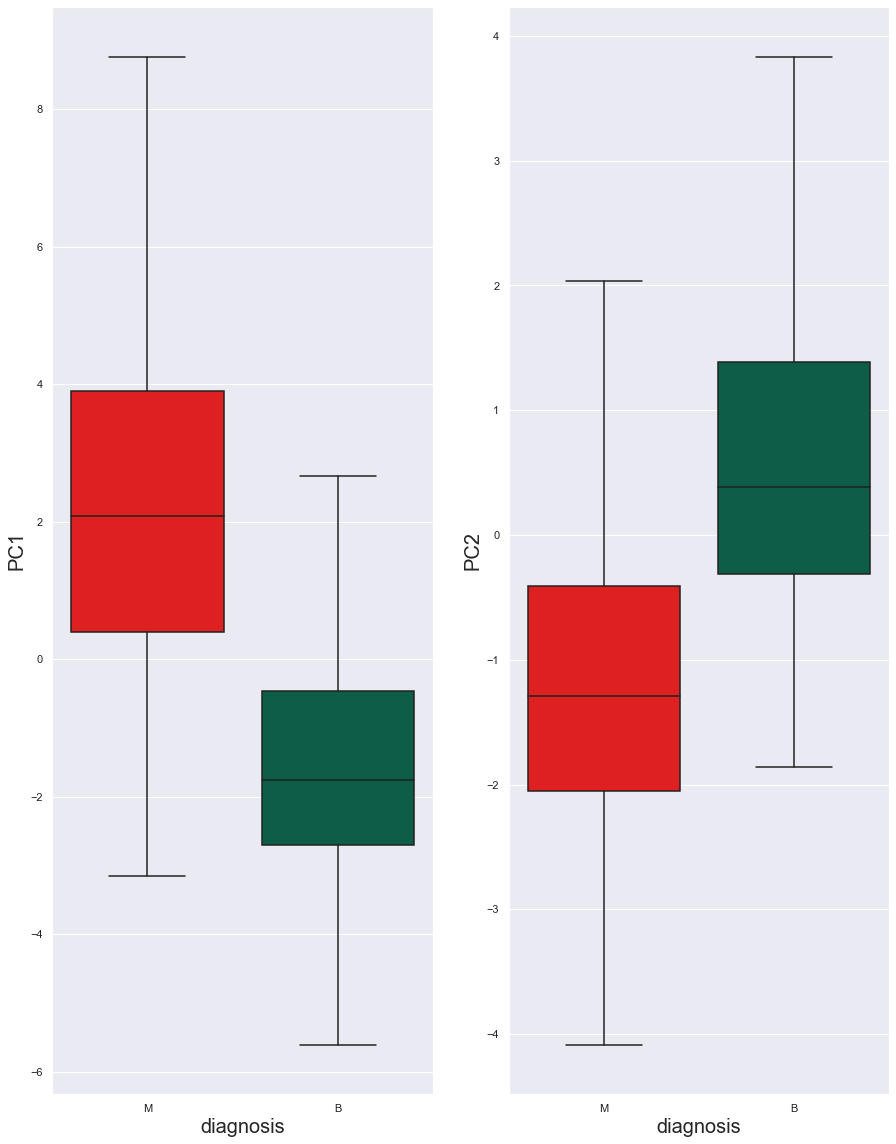

In [22]:
df_pca_clean = pd.DataFrame(pca_clean, columns=['PC1', 'PC2'])

# afegim la variable de classe
diagnosis = df['diagnosis']
df_pca_clean = df_pca_clean.join(diagnosis)
df_pca_clean.head()

# un cop tenim el dataframe mostrem els plots
attr_to_explore=['PC1', 'PC2']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,20))

idx = 0
for ax in axes.flat:
    plt.sca(ax)
    plt.ylabel(attr_to_explore[idx], size = 20)
    plt.xlabel('Diagnosis', size = 20)
    col = attr_to_explore[idx]
    my_colors = ["#ff0000", "#006a4e"]
    sns.set_palette(my_colors)
    sns.boxplot(x='diagnosis', y=col, data=df_pca_clean, showfliers=False)
    idx = idx+1
plt.show()



Com hem comentat i podem apreciar els resultats són millors amb el dataset reduït ja que el PC2 ens discrimina millor. El PC1 és similar i discrimina igual de bé que abans.

Per a transformar les variables d'entrada en les sortides s'apliquen sobre les variables d'entrada els vectors propis (eigenvectors). Per tant, tindrem dos eigenvectors, un per a cada component principal.

In [23]:
print('% de Variança explicada = ', pca.explained_variance_ratio_)
print('Principal Components (Eigenvectors)= ', pca.components_)

% de Variança explicada =  [0.43308846 0.1435797 ]
Principal Components (Eigenvectors)=  [[ 0.0877829   0.14828829  0.21816849  0.31275831  0.29891565  0.21604446
   0.20224691  0.03969137  0.1513705   0.07939242  0.26755653  0.23849102
   0.24105122  0.10343773  0.20845892  0.20273446  0.28564906  0.28884886
   0.2696419   0.18936938  0.24848712]
 [-0.13845645 -0.41962776  0.07188842 -0.06182459 -0.16140403  0.09286839
   0.35508497  0.24523801 -0.25696913  0.36397123  0.15849525  0.12496304
   0.05905817  0.29923734  0.3108275   0.00460321 -0.12483644 -0.17783006
  -0.29392088 -0.04124896  0.10315137]]


Previament hem mostrat tant els eigenvectors amb els que calculariem els nous atributs com el % de variança explicada que no arriba al 60%. Reduint a 2 atributs perdem més d'un 40% de la variança de la mostra inicial.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Pregunta:</strong> Quin altre mètode o mètodes de reducció de dimensionalitat es podrien aplicar?</div>

Podem aplicar altres mètodes de reducció de la dimensionalitat com ara Single Value Decomposition (SVD) o Factorització de Matrius No Negatives (NMF o NNMF). Tant PCA, SVD o NMF són mètodes de fusió i creació de nous atribits.

Altres formes de reduír la dimensionalitat seria una selecció d'atributs que generin una qualitat similar a la del dataset original. Seleccionem atributs a eliminar sense perdre gran part de la informació. Per exemple, en l'apartat on hem eliminat els atributs que estaven forçament correlacionats hem aplicat aquest principi.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> escull un mètode de reducció i genera el gràfic (2D) amb el resultat.</div>

Text(0, 0.5, 'Segon component principal')

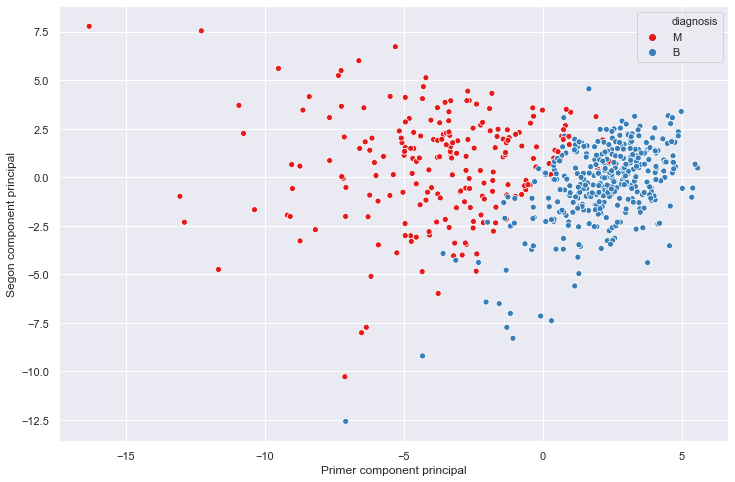

In [24]:
# Anem a fer SVD sobre el dataset complet i eliminem la variable de classe diagnosis.
df_svd_all = df.drop(['diagnosis'], axis=1)

# normalitzem totes els atributs amb la classe StandarScaler
scaler = StandardScaler()
scaler.fit(df_svd_all)
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_data = scaler.transform(df_svd_all)

U, S, VT = np.linalg.svd(scaled_data)
svg = np.dot(scaled_data, VT.T)

ax = plt.figure(figsize=(12,8))
sns.scatterplot(svg[:,0],svg[:,1],hue=df['diagnosis'], palette ='Set1' )
plt.xlabel('Primer component principal')
plt.ylabel('Segon component principal')

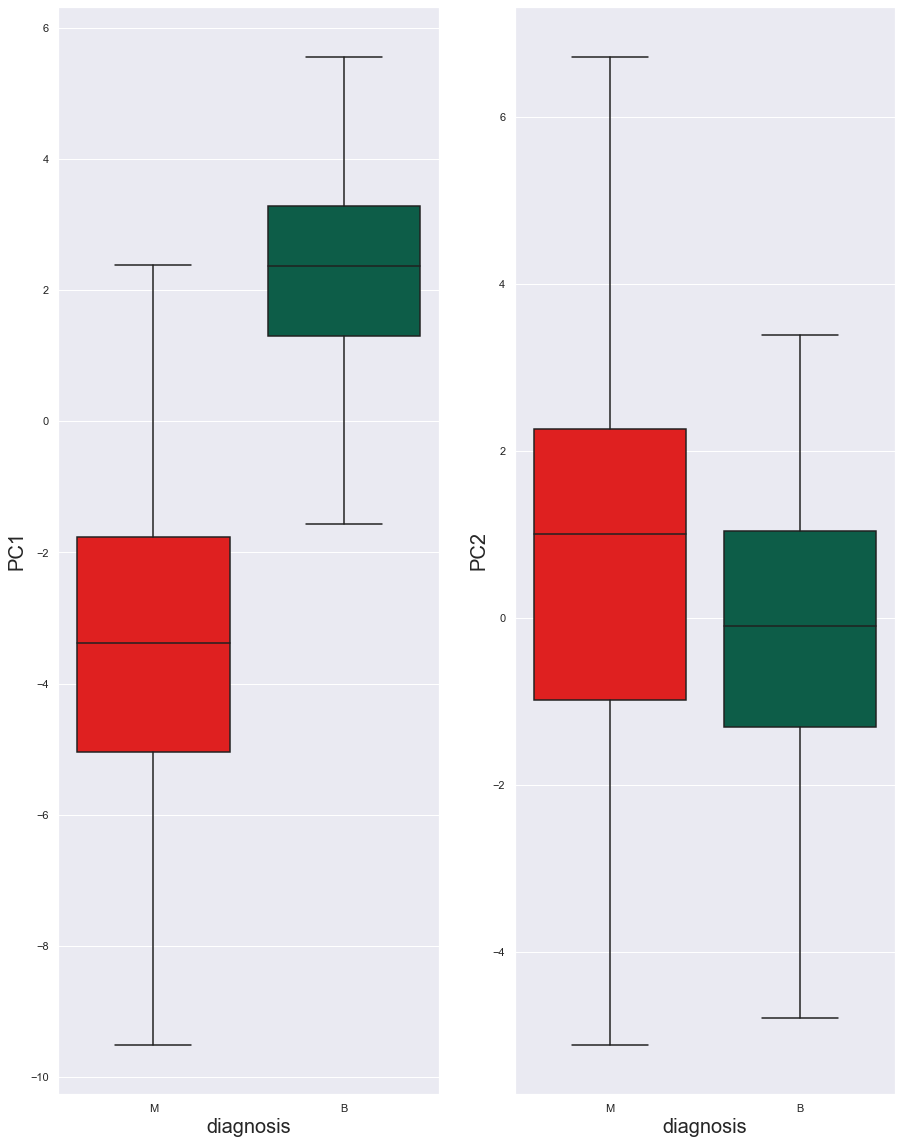

In [25]:
df_svg = pd.DataFrame(svg[:,[0,1]], columns=['PC1', 'PC2'])

# afegim la variable de classe
diagnosis = df['diagnosis']
df_svg = df_svg.join(diagnosis)

# un cop tenim el dataframe mostrem els plots
attr_to_explore=['PC1', 'PC2']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,20))

idx = 0
for ax in axes.flat:
    plt.sca(ax)
    plt.ylabel(attr_to_explore[idx], size = 20)
    plt.xlabel('Diagnosis', size = 20)
    col = attr_to_explore[idx]
    my_colors = ["#ff0000", "#006a4e"]
    sns.set_palette(my_colors)
    sns.boxplot(x='diagnosis', y=col, data=df_svg, showfliers=False)
    idx = idx+1
plt.show()


Amb SVD amb tot el dataset els resultats són força similars a PCA.

Ara farem amb el dataset amb la reducció d'atributs altament correlacionats:

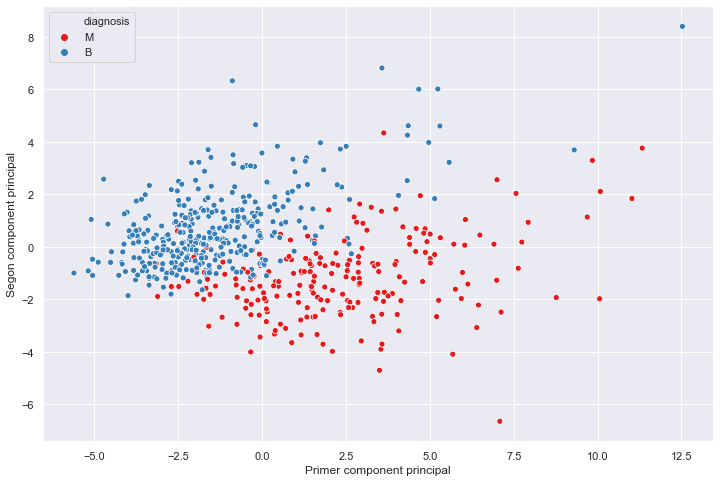

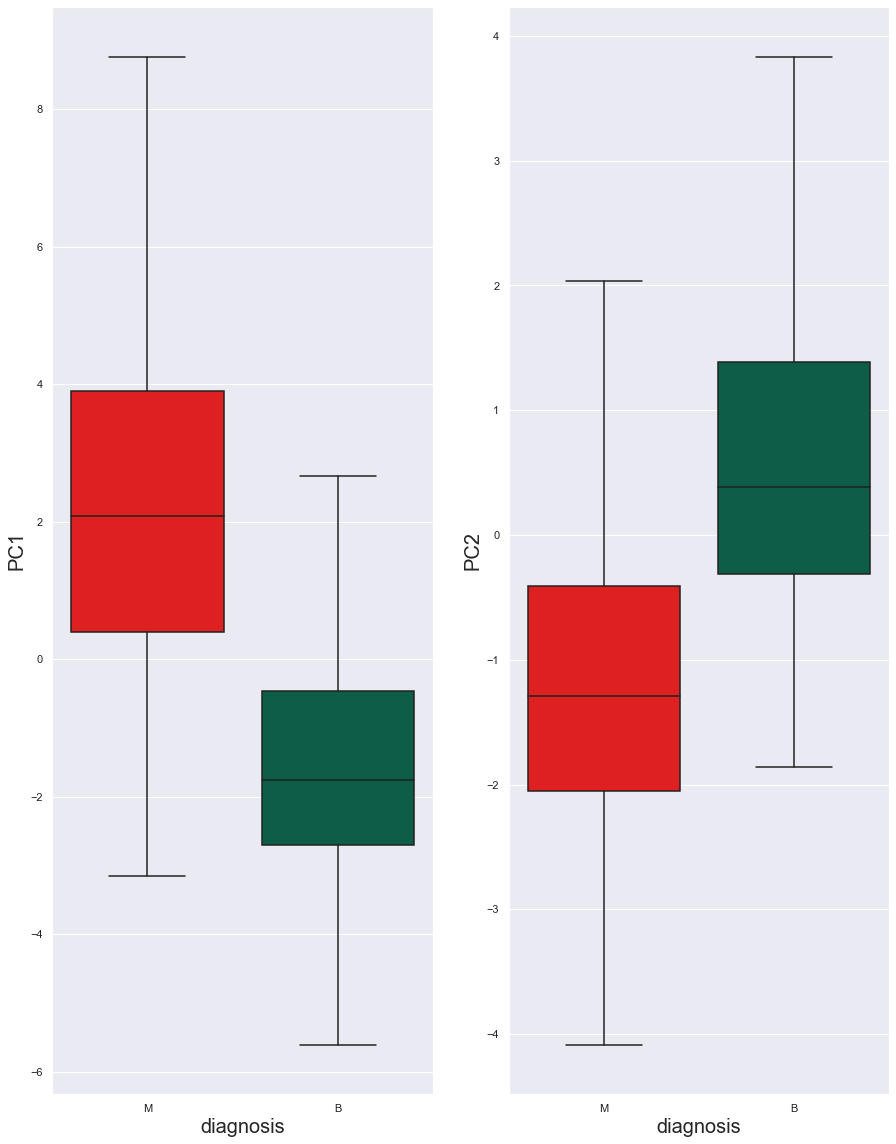

In [26]:
df_svd_clean = df_clean.drop(['diagnosis'], axis=1)

# normalitzem totes els atributs amb la classe StandarScaler
scaler = StandardScaler()
scaler.fit(df_svd_clean)
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_data = scaler.transform(df_svd_clean)

U, S, VT = np.linalg.svd(scaled_data)
svg = np.dot(scaled_data, VT.T)

ax = plt.figure(figsize=(12,8))
sns.scatterplot(svg[:,0],svg[:,1],hue=df['diagnosis'], palette ='Set1' )
plt.xlabel('Primer component principal')
plt.ylabel('Segon component principal')

df_svg = pd.DataFrame(svg[:,[0,1]], columns=['PC1', 'PC2'])

# afegim la variable de classe
diagnosis = df['diagnosis']
df_svg = df_svg.join(diagnosis)

# un cop tenim el dataframe mostrem els plots
attr_to_explore=['PC1', 'PC2']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,20))

idx = 0
for ax in axes.flat:
    plt.sca(ax)
    plt.ylabel(attr_to_explore[idx], size = 20)
    plt.xlabel('Diagnosis', size = 20)
    col = attr_to_explore[idx]
    my_colors = ["#ff0000", "#006a4e"]
    sns.set_palette(my_colors)
    sns.boxplot(x='diagnosis', y=col, data=df_svg, showfliers=False)
    idx = idx+1
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> en comparació amb el PCA, quin mètode ha resultat més efectiu per a visualitzar les dues classes de diagnòstic de forma separada? Quan és més adequat fer servir PCA o l'altre mètode escollit?</div>

Realment no hem pogut apreciar gaires diferencies entre la reducció per PCA i SVD. SVD i PCA tenen relació alhora de reduir la dimensionalitat del dataset. PCA fà servir la matriu de covariança i transfomar linealment les variables d'entrada per uns altres eixos de coordenades més reduït no correlacionats. SVD divideix la matriu inicial en producte de matrius amb la particularitat que no omet components menys importants com si fa PCA. Per tant, podriem fer PCA si eliminessim els atributs menys rellevants en la matriu original abans de fer SVD. És el que sembla que passa amb els test de PCA i SVD que hem fet sobre el dataset reduït previament.

# 4. Entrenament i test (3 punts)

En aquest últim exercici, aplicarem un mètode d'aprenentatge supervisat, concretament el classificador Decision Tree (un arbre de decisió), per predir el diagnòstic de càncer de mama (tumor benigne o maligne) i avaluar la precisió obtinguda amb el model. 

Per a això farem servir:
- El conjunt de dades original amb tots els atributs
- El conjunt de dades reduït a només 2 atributs amb PCA
- El conjunt de dades sense les variables fortament correlacionada i reduït a només 2 atributs amb el mètode PCA

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> usant el conjunt de dades original:
  - Dividiu el dataset en train i test.
  - Definiu un model Decision Tree (fixant max_depth=5 per mantenir el model simple).
  - Apliqueu validació creuada amb el model definit i el dataset de train (amb cv=5 ja és suficient).
  - Calculeu la mitjana i la desviació estàndard de la validació creuada.
</div>

**Notes**: 
- Per separar entre train i test podeu fer servir ``train_test_split`` de ``sklearn``.
- Per entrenar un model _decision tree_ podeu fer servir ``DecisionTreeClassifier`` de ``sklearn``.
- Per aplicar validació creuada podeu fer servir ``cross_val_score`` de ``sklearn``.

Fem l'aprenentatge amb tot el dataset, 30 atributs explicatius i el de classe (diagnosis)

In [27]:
# el primer que fem és dividir el nostre dataset en dos conjunts un per entrenament i l'altre per fer test del model d'entrenament obtingut.
# cada un d'aquests grups te les variables explicatives X i variable de sortida o explicada Y.
X = df.drop(['diagnosis'], axis=1)
Y = df.loc[:, 'diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# ara anem a entrenar el model amb les dades que hem separat per a train
tree = DecisionTreeClassifier(random_state=0, max_depth=5)
tree.fit(X_train, Y_train)

# ara que tenim el model entrenat anem a comprovar la qualitat amb les dades de test i amb les d'entrenament
print("L'exactitud o accuracy del model amb les dades d'entrenament és de: {:.3f}".format(tree.score(X_train, Y_train)))
print("L'exactitud o accuracy del model amb les dades de test és de: {:.3f}".format(tree.score(X_test, Y_test)))

# ara realitzem la validació creuada i mostrem la mitja i desviació estandard
scores = cross_val_score(tree, X, Y, cv=5)
print('Accuracy del model (mean +/- std): %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

# predicció del model
Y_pred = tree.predict(X_test)

print("Accuracy de la prediccó: ", accuracy_score(Y_test, Y_pred))

L'exactitud o accuracy del model amb les dades d'entrenament és de: 0.996
L'exactitud o accuracy del model amb les dades de test és de: 0.939
Accuracy del model (mean +/- std): 0.916 +/- 0.016
Accuracy de la prediccó:  0.9385964912280702


Tenim un model amb una predicció molt bona.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    <strong>Exercici:</strong> feu el <i>fit</i> amb tot el conjunt de train, i genereu l'arbre de decisió corresponent.</div>

**Nota**: per dibuixar arbres de decisió, podeu consultar:
- https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc

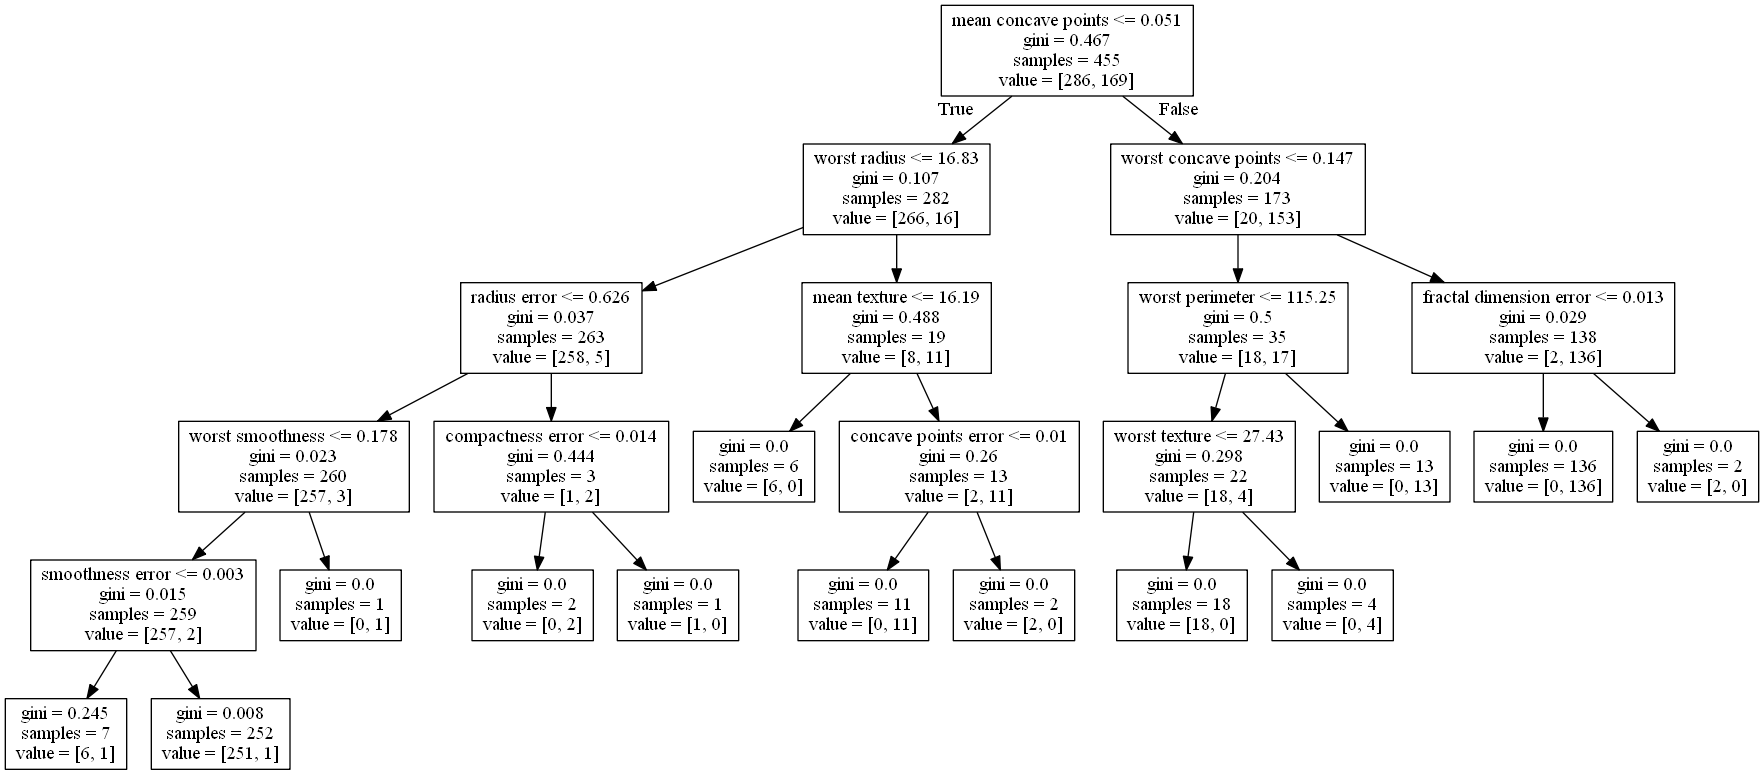

In [28]:
X = df.drop(['diagnosis'], axis=1)
Y = df.loc[:, 'diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

tree = DecisionTreeClassifier(random_state=0, max_depth=5)
tree.fit(X_train, Y_train)

digraph_tree = export_graphviz(tree, feature_names=X.columns)

graph = pydotplus.graph_from_dot_data(digraph_tree)
Image(graph.create_png())

En l'arbre generat per a realitzar les prediccions el primer atribut que discrimina és mean concave points. Als boxplot ja havíem vist que discriminava prou bé. En total fem servir 12 atributs per a classificar.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> repetiu el mateix procediment que en l'exercici anterior amb el dataset reduït a 2 dimensions amb PCA.</div>

In [29]:
# repetim el procés però ara amb el dataset de tots els atributs reduït amb PCA

# el primer que fem és dividir el nostre dataset en dos conjunts un per entrenament i l'altre per fer test del model d'entrenament obtingut.
# cada un d'aquests grups te les variables explicatives X i variable de sortida o explicada Y.
print("Tenim un dataset amb PCA de (Files , Columnes): ", str(pca_all.shape))
X = pca_all
Y = df_pca_all.loc[:, 'diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# ara anem a entrenar el model amb les dades que hem separat per a train
tree_pca = DecisionTreeClassifier(random_state=0, max_depth=5)
tree_pca.fit(X_train, Y_train)

# ara que tenim el model entrenat anem a comprovar la qualitat amb les dades de test i amb les d'entrenament
print("L'exactitud o accuracy del model amb les dades d'entrenament és de: {:.3f}".format(tree_pca.score(X_train, Y_train)))
print("L'exactitud o accuracy del model amb les dades de test és de: {:.3f}".format(tree_pca.score(X_test, Y_test)))

# ara realitzem la validació creuada i mostrem la mitja i desviació estandard
scores = cross_val_score(tree_pca, X, Y, cv=5)
print('Accuracy del model (mean +/- std): %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

# predicció del model
Y_pred = tree_pca.predict(X_test)

print("Accuracy de la prediccó: ", accuracy_score(Y_test, Y_pred))

Tenim un dataset amb PCA de (Files , Columnes):  (569, 2)
L'exactitud o accuracy del model amb les dades d'entrenament és de: 0.976
L'exactitud o accuracy del model amb les dades de test és de: 0.974
Accuracy del model (mean +/- std): 0.928 +/- 0.019
Accuracy de la prediccó:  0.9736842105263158


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> repetiu el mateix procediment que en l'exercici anterior amb el conjunt de dades sense les variables fortament correlacionades i reduït a només 2 atributs amb el mètode PCA.
</div>

In [30]:
# repetim el procés però ara amb el dataset net de les variables fortament correlacionades reduït amb PCA

# el primer que fem és dividir el nostre dataset en dos conjunts un per entrenament i l'altre per fer test del model d'entrenament obtingut.
# cada un d'aquests grups te les variables explicatives X i variable de sortida o explicada Y.
print("Tenim un dataset amb reducció de variables correlacionades i PCA posterior amb Files , Columnes: ", str(pca_clean.shape))
X = pca_clean
Y = df_pca_clean.loc[:, 'diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# ara anem a entrenar el model amb les dades que hem separat per a train
tree_pca_clean = DecisionTreeClassifier(random_state=0, max_depth=5)
tree_pca_clean.fit(X_train, Y_train)

# ara que tenim el model entrenat anem a comprovar la qualitat amb les dades de test i amb les d'entrenament
print("L'exactitud o accuracy del model amb les dades d'entrenament és de: {:.3f}".format(tree_pca_clean.score(X_train, Y_train)))
print("L'exactitud o accuracy del model amb les dades de test és de: {:.3f}".format(tree_pca_clean.score(X_test, Y_test)))

# ara realitzem la validació creuada i mostrem la mitja i desviació estandard
scores = cross_val_score(tree_pca_clean, X, Y, cv=5)
print('Accuracy del model (mean +/- std): %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

# predicció del model
Y_pred = tree_pca_clean.predict(X_test)

print("Accuracy de la prediccó: ", accuracy_score(Y_test, Y_pred))

Tenim un dataset amb reducció de variables correlacionades i PCA posterior amb Files , Columnes:  (569, 2)
L'exactitud o accuracy del model amb les dades d'entrenament és de: 0.963
L'exactitud o accuracy del model amb les dades de test és de: 0.912
Accuracy del model (mean +/- std): 0.898 +/- 0.020
Accuracy de la prediccó:  0.9122807017543859


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> Amb quines dades ha funcionat millor? Té sentit? És coherent amb els resultats que hem vist en l'exercici 3?
</div>

El model que millor ha funcionat ha estat el **PCA sense haver reduït la dimensionalitat previament**. Amb el que hem perdut més precissió és amb el darrer model, PCA havent reduït la dimensionalitat per correlació de variables. De totes formes la diferencia és molt petita i sembla coherent amb les dades de l'exercici 3.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> amb el millor model que hagueu obtingut:
  - Genereu prediccions sobre el dataset de test.
  - Calculeu la precisió de les prediccions obtingudes i la matriu de confusió associada.
</div>

**Nota**: per calcular la precisió i la matriu de confusió podeu fer servir les funcions dins del mòdul ``metrics`` de ``sklearn``.

Calculem tant la precissió com la matriu de confussió del model on hem fet només PCA:

In [31]:
X = pca_all
Y = df_pca_all.loc[:, 'diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# ara anem a entrenar el model amb les dades que hem separat per a train
tree_pca = DecisionTreeClassifier(random_state=0, max_depth=5)
tree_pca.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = tree_pca.predict(X_test)

print("Accuracy de la predicció: ", accuracy_score(Y_test, Y_pred))

Accuracy de la predicció:  0.9736842105263158


[[41  2]
 [ 1 70]]


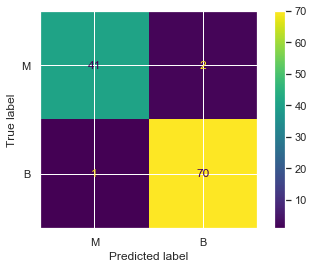

In [32]:
cm = confusion_matrix(Y_test, Y_pred, labels= ['M', 'B'])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['M', 'B'])
disp.plot()
plt.show()

La classe positiva és M i negativa B, llavors:
    
    - Veritable positiu (True Positive, TP): 41
    - Veritable negatiu (True Negative, TN): 70
    - Fals positiu (False Positive, FP): 1
    - Fals negatiu (False Negative, FN): 2

L'error de classificació és:

    ERR = 3 / (41 + 70 + 1 + 2) = 0.026

L'exactitud:

    ACC = 1 - ERR = 0.974

Precissió:

    PRE = 41 / (41 + 1) = 0.976

Sensibilitat:

    SEN = 41 / (2 + 41) = 0.953